<a href="https://colab.research.google.com/github/DaniloDantas/Projeto-ETL-sobre-Filmes/blob/main/Mini_Projeto_Filmes_DSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

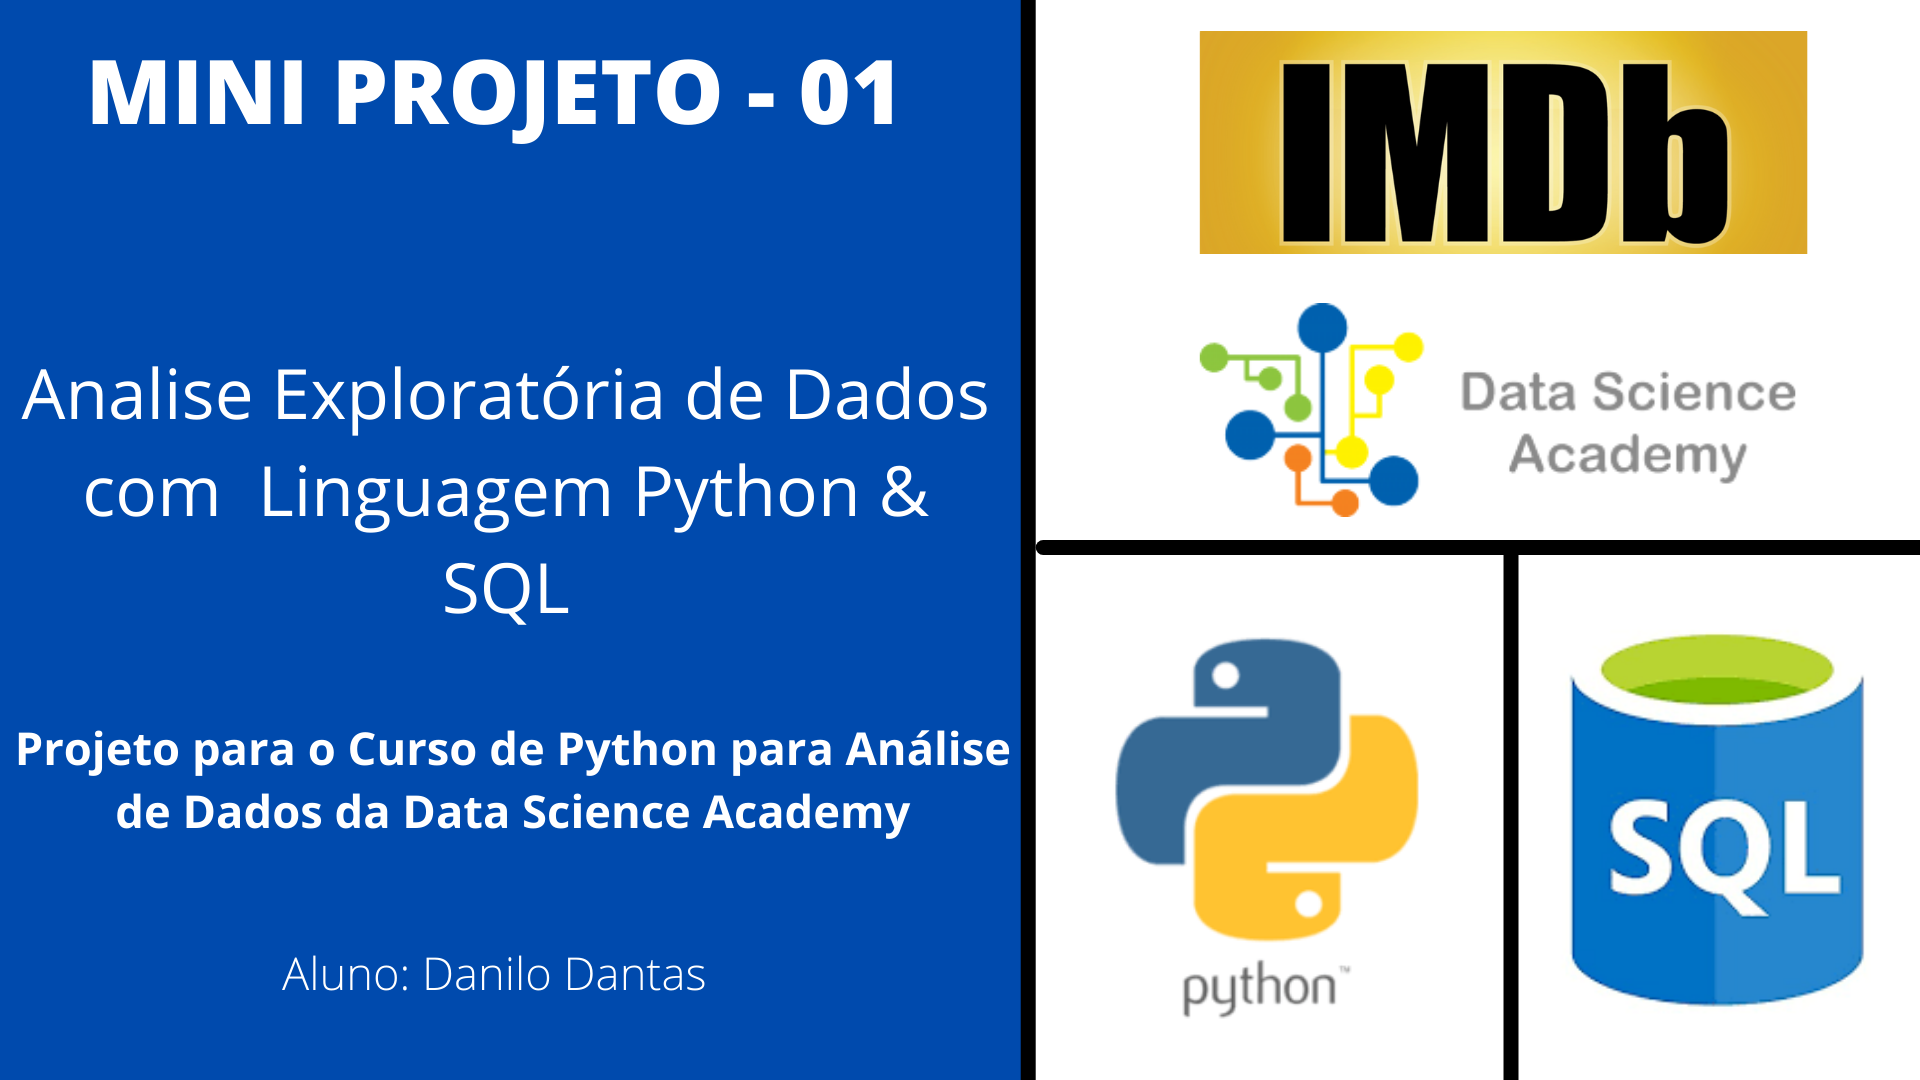

# **Mini Projeto de Análise Exploratória de Dados.**

Esse projeto é de nível básico e voltado para a conclusão do capítulo 06 do curso de Python para análise de dados na Data Science Academy.

**Base de Dados:** Vamos utilizar um dataset de dados reais sobre filmes disponibilizado pela IMDb disponível no link: https://www.imdb.com/interfaces/

**Ferramentas:** para realizar nossas análises vamos usar linguagem Python, SQL e o Banco de Dados SQLITE3. 

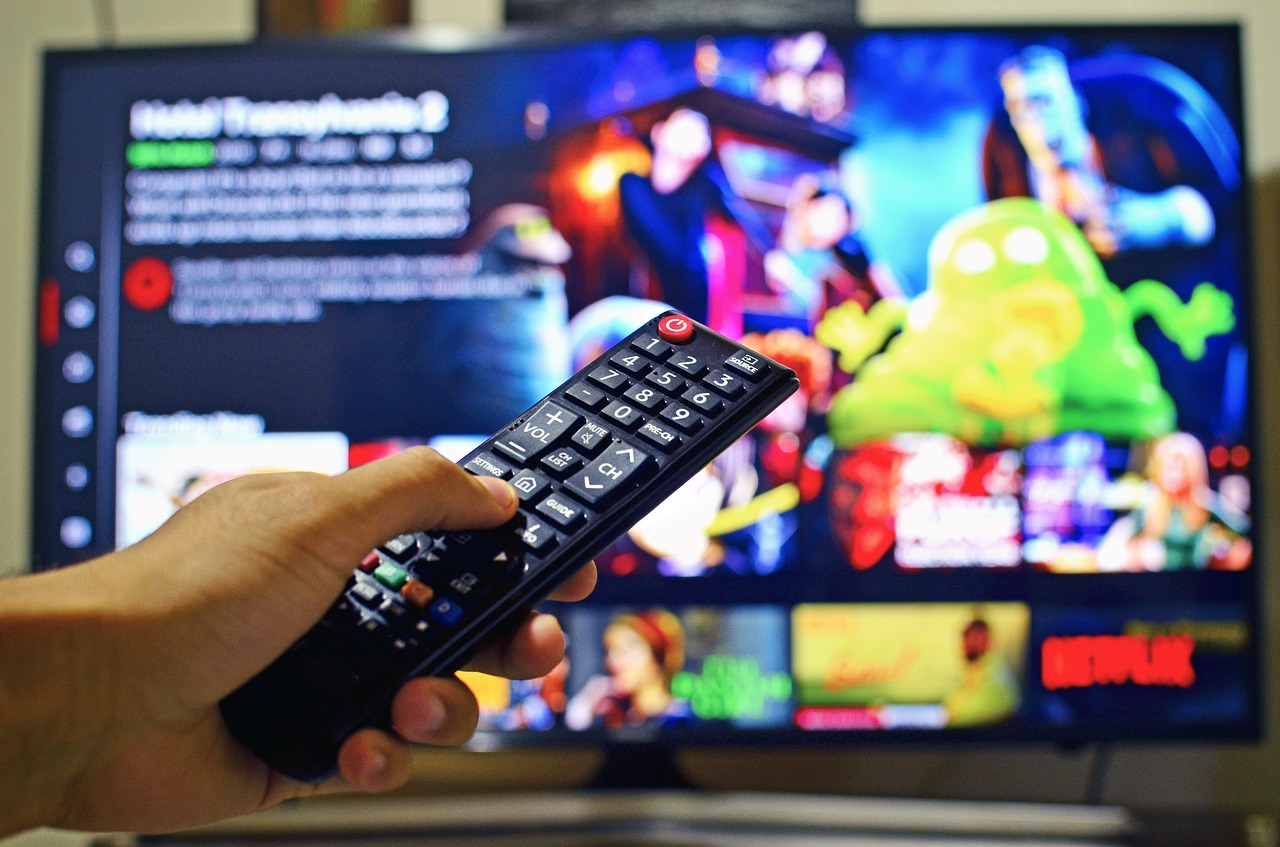

# Contexto: **10 curiosidades sobre filmes através da análise de dados**



***Streaming*** é a tecnologia de transmissão de conteúdo online que nos permite consumir filmes, séries, músicas dentre outros. Nesse projeto focaremos nos serviços *streaming* de televisão e filmes.

Durante a pandemia os *streamings* de vídeo ultrapassaram **a marca de 1 bilhão** **de assinaturas** devido as crescentes procuras por esse serviço em 2020 de acordo com a Motion Picture Association (MPA). 

Segundo o estudo da MPA o mercado de entretenimento móvel **teve uma receita global de US&#36; 69BI** nesse mesmo ano.

Devido a essa crescente demanda, surgiram novos provedores para concorrer com a pioneira Netflix ( que é avaliada em US&#36; 225.4 BI), como por exemplo: Disney Plus, Amazon Prime Video, Starz, e o mercado já chamou atenção até da coreana Samsung e da inovadora Apple, que manifestaram interesse em pegar uma fatia desse mercado.

Além da forte tendência de crescimento no entretenimento online, bem como o fato de **o Brasil ocupar o segundo lugar** **no ranking de assinantes da Netflix** em todo o mundo, é que decidi realizar o meu primeiro projeto de análise de dados voltado a filmes e cinema.

Para tal, usaremos o database disponibilizado pelo **IMDb** (Internet Movie Database) que foi criada em 1990 e possui uma base de dados online da Amazon de informação sobre cinema, TV, música e games. Essa plataforma é uma das fontes mais populares do mundo quando se pensa em conteúdo de filmes, TV e celebridades. 

A Internet Movie Database, disponibiliza uma série de informações dos **mais de 4 milhões de filmes**, programas de TV e entretenimento, incluindo horários de exibição de filmes nos cinemas, trailers, críticas, avaliações de usuários, recomendações personalizadas, dados de bilheteria, entre outros.

Nessa análise exploratória buscaremos responder algumas questões de negócios, para entender por exemplo quais as categorias de filmes mais comuns, a mediana de avaliação dos filmes, o top 10 melhores e os piores filmes de acordo com as avaliações. Visando auxiliar na possível tomada de decisão de quais títulos manter ou adicionar no catálogo de streaming de acordo com as avaliações do IMDb.

Ademais, buscaremos responder outras perguntas como:

**1-** Quais São as Categorias de Filmes Mais Comuns no IMDB?

**2-** Qual o Número de Títulos Por Gênero?

**3-** Qual a Mediana de Avaliação dos Filmes Por Gênero?

**4-** Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estreia?

**5-** Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estreia?

**6-** Qual o Filme Com Maior Tempo de Duração?

**7-** Qual a Relação Entre Duração e Gênero?

**8-** Qual o Número de Filmes Produzidos Por País?

**9-** Quais São os Top 10 Melhores Filmes?

**10-** Quais São os Top 10 Piores Filmes?



### **Preparação do Ambiente:**



*   Instalação de pacote;
*   Load dos arquivos;
*   Dicionário do dataset;
*   Views de tabelas;





**Instalando os Pacotes:**

In [1]:
# Pacote para importar todos os arquivos do IMBD

!pip install -q imdb-sqlite

In [2]:
# Pacote para converter os códigos ISO em nomes de países.

!pip install -q pycountry

     |████████████████████████████████| 10.1 MB 6.9 MB/s 


**Carregando Pacotes:**

In [3]:
import re             # Pacote de expressões regulares para tratamento de texto.
import time           # Pacote para datas e tempo.
import sqlite3        # Pacote para banco de dados em python.
import pycountry      # Pacote para conversão de códigos ISO em nomes de nação.
import numpy as np    # Pacote para análises de dados.
import pandas as pd   # Pacote para análises de dados.
import matplotlib.pyplot as plt # Pacote para Visualização de Dados.
import seaborn as sns           # Pacote para Visualização de Dados.
from matplotlib import cm       # Módulo para Visualização de Dados.
from sklearn.feature_extraction.text import CountVectorizer
#Pacote para Vetores.
import warnings                    # Pacote para tratamento de erros.
warnings.filterwarnings("ignore")  # Filtrando os erros.
sns.set_theme(style = "whitegrid") # Definição dos temas dos gráficos

**Carregando os arquivos:**


In [4]:
!imdb-sqlite # Carregando os arquivos

2021-09-27 19:40:35,965 GET https://datasets.imdbws.com/name.basics.tsv.gz -> downloads/name.basics.tsv.gz
2021-09-27 19:40:37,559 GET https://datasets.imdbws.com/title.basics.tsv.gz -> downloads/title.basics.tsv.gz
2021-09-27 19:40:38,399 GET https://datasets.imdbws.com/title.akas.tsv.gz -> downloads/title.akas.tsv.gz
2021-09-27 19:40:45,505 GET https://datasets.imdbws.com/title.principals.tsv.gz -> downloads/title.principals.tsv.gz
2021-09-27 19:40:47,877 GET https://datasets.imdbws.com/title.episode.tsv.gz -> downloads/title.episode.tsv.gz
2021-09-27 19:40:49,519 GET https://datasets.imdbws.com/title.ratings.tsv.gz -> downloads/title.ratings.tsv.gz
2021-09-27 19:40:49,614 Populating database: imdb.db
2021-09-27 19:40:49,614 Applying schema
2021-09-27 19:40:49,616 Importing file: downloads/name.basics.tsv.gz
2021-09-27 19:40:49,616 Reading number of rows ...
2021-09-27 19:40:55,318 Inserting rows into table: people
100% 11251043/11251043 [02:00<00:00, 93557.37 rows/s]
2021-09-27 19:4

In [5]:
# Criando a conexão com o Banco de Dados

conn = sqlite3.connect('imdb.db')

In [6]:
# Extraindo as listas da tabela

table = pd.read_sql_query('SELECT NAME AS "Name_Table" FROM sqlite_master WHERE type = "table"',conn)

In [7]:
# Visualizando o resultado do dataframe

table.head()

,Name_Table
0,people
1,titles
2,akas
3,crew
4,episodes


**Dicionário da tabela:**

`people:` Contêm informações sobre as pessoas dos filmes.

`titles:` Nome dos títulos de filmes.

`akas:` Dados sobre os títulos dos filmes.

`crew:` Contêm informações sobre o diretor e escritor dos filmes.
 
`episodes:` Contêm informações sobre os episódios dos filmes.

In [8]:
# Convertendo o Dataframe em lista

table = table['Name_Table'].values.tolist()

In [9]:
# Extraindo os Schemas das tabelas no Database:

for table in table:
  consulta = 'PRAGMA TABLE_INFO({})'.format(table)
  resultado = pd.read_sql_query(consulta, conn)
  print("Esquema de tabela: ", table)
  display(resultado)
  print("-"*100)
  print("\n")

Esquema de tabela:  people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema de tabela:  titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema de tabela:  akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema de tabela:  crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema de tabela:  episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema de tabela:  ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




Ao visualizar os schemas de cada tabela, já conseguimos extrair bastante informações sobre os tipos de dados de cada uma delas, como por exemplo:



*   A tabela `episodes` é somente dados inteiros e portanto quantitativos.
*   Já a tabela `crew` é somente dados varchar, então é string e poderá ser dados qualitativos.
*   E ambas não possuem dados nulos






### **1- Quais São as Categorias de Filmes Mais Comuns no IMDB?**

In [10]:
# Fazendo a busca com o SQL e armazenando em uma variável

consulta1 = 'SELECT type, COUNT(*) AS Count FROM titles GROUP BY type'

In [11]:
# Extraindo o resultado

resultado1 = pd.read_sql_query(consulta1, conn)

In [12]:
# Visualizando o resultado

display(resultado1)

,type,Count
0,movie,589307
1,radioEpisode,1
2,short,833023
3,tvEpisode,6094858
4,tvMiniSeries,39933
5,tvMovie,133113
6,tvPilot,1
7,tvSeries,215778
8,tvShort,10302
9,tvSpecial,34215


In [13]:
# Acrescentando uma outra categoria para as Frequências Relativas.

resultado1["Percentual"] = (resultado1['Count'] / resultado1['Count'].sum())*100
display(resultado1)

,type,Count,Percentual
0,movie,589307,7.097609
1,radioEpisode,1,0.000012
2,short,833023,10.032922
3,tvEpisode,6094858,73.406420
4,tvMiniSeries,39933,0.480953
5,tvMovie,133113,1.603212
6,tvPilot,1,0.000012
7,tvSeries,215778,2.598828
8,tvShort,10302,0.124077
9,tvSpecial,34215,0.412085


**Observação:**

Para melhor entendimento vamos agrupar o resultado acima em apenas 4 categorias. Sendo uma categorias para todos os grupos com resultado menores que 5% e as outras serão a TOP3

In [14]:
# Filtrando as categorias

others = {} 

# Filtrando as categorias <= 5% e somando o total
others['Count'] = resultado1[resultado1['Percentual'] < 5]['Count'].sum()

others['Percentual'] = resultado1[resultado1['Percentual'] < 5]['Percentual'].sum()

others['type'] = 'others'

In [15]:
# Resultado do filtro

others

{'Count': 785707, 'Percentual': 9.463048731797764, 'type': 'others'}

In [16]:
# Filtra o dataframe de resultado

resultado1 = resultado1[resultado1['Percentual'] > 5]

In [17]:
# Append com o dataframe de outras categorias

resultado1 = resultado1.append(others, ignore_index = True)

In [18]:
# Ordenando o resultado no DF

resultado1 = resultado1.sort_values(by = 'Count', ascending = False)

In [19]:
resultado1.head()

,type,Count,Percentual
2,tvEpisode,6094858,73.406420
1,short,833023,10.032922
3,others,785707,9.463049
0,movie,589307,7.097609


In [20]:
# Configurando os rótulos

labels = [str(resultado1['type'][i]) + ' ' + '['+ str(round(resultado1['Percentual'][i],2)) + '%' + ']' for i in resultado1.index]

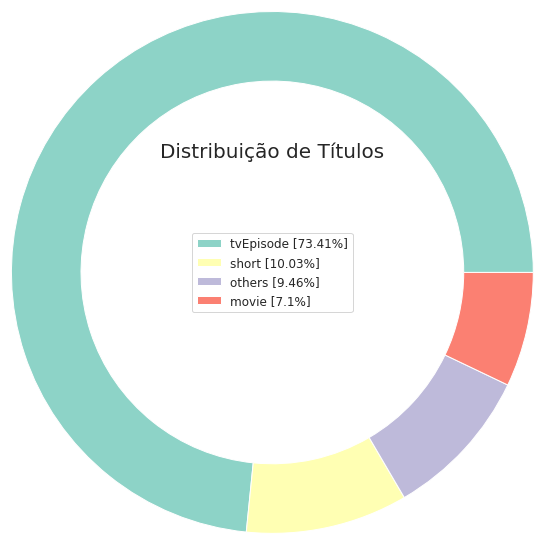

In [21]:
# Plotando o gráfigo

# Mapa de cores
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set3(np.arange(100))

# Criando a figura
f = plt.figure()

# Gráfico de Pizza
plt.pie(resultado1['Count'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()


**Resposta à Questão 01:** 

As Categorias de Filmes Mais Comuns no IMDB, são:

**1.** Episodios de TV com 73%.

**2.** Filmes de curta metragem com 10%. E,

**3.** Filmes convencionais com 7%

Todas as outras categorias como: Episodio de rádio, Séries, e Video Games que foram inferiores a 5% agrupamos na categoria outros. Que somados são responsável por 9% da categoria dos mais comuns.


### **2 -  Qual o percentual de Títulos Por Gênero?**

In [22]:
 # Criando a consulta SQL

 consulta2 = '''SELECT genres, COUNT(*) AS Count FROM titles WHERE type = "movie" 
 GROUP BY genres'''

In [23]:
# Convertendo a Query em Dataframe

resultado2 = pd.read_sql_query(consulta2,conn)

In [24]:
# Mostrando o resultado

display(resultado2)

,genres,Count
0,Action,13452
1,"Action,Adult",11
2,"Action,Adult,Adventure",1
3,"Action,Adult,Comedy",5
4,"Action,Adult,Crime",10
...,...,...
1442,"Thriller,Western",39
1443,War,1261
1444,"War,Western",9
1445,Western,4039


**Observação:**

Vamos transformar a coluna de strings toda para mínuscula para facilitar o tratamento dos dados.

Também temos cerca de 70 mil filmes sem categoria, nesse caso vamos optar por excluí-los

In [25]:
# Convertendo todas os textos para minusculos

resultado2['genres'] = resultado2['genres'].str.lower().values

In [26]:
# Excluindo os valores ausentes

temp = resultado2['genres'].dropna()

In [27]:
# Usando um vetor e expressão regular para filtrar as strings

padrao = '(?u)\\b[\\w-]+\\b'

vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

In [28]:
# Aplicando a vetorização ao dataset sem valores NA

bag_generos = vetor.transform(temp)

In [29]:
# Retornando os gêneros únicos

generos_unicos =  vetor.get_feature_names()

In [30]:
# Criando o dataframe de gêneros

generos = pd.DataFrame( bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [31]:
# Imprimindo na tela

generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1446
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1447 non-null   int64
 1   adult        1447 non-null   int64
 2   adventure    1447 non-null   int64
 3   animation    1447 non-null   int64
 4   biography    1447 non-null   int64
 5   comedy       1447 non-null   int64
 6   crime        1447 non-null   int64
 7   documentary  1447 non-null   int64
 8   drama        1447 non-null   int64
 9   family       1447 non-null   int64
 10  fantasy      1447 non-null   int64
 11  film-noir    1447 non-null   int64
 12  game-show    1447 non-null   int64
 13  history      1447 non-null   int64
 14  horror       1447 non-null   int64
 15  music        1447 non-null   int64
 16  musical      1447 non-null   int64
 17  mystery      1447 non-null   int64
 18  n            1447 non-null   int64
 19  news         1447 non-null   int64
 20  reality-

Como surgiu um 'n' na posição 18 inesperadamente, vamos precisar remove-lo

In [32]:
# Excluindo o index 18

generos = generos.drop(columns = 'n', axis = 0)

In [33]:
# Encontrando os valores relativos - percentuais

generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]

In [34]:
# Imprimindo na tela

generos_percentual.head(10)

drama          18.382861
comedy         16.931583
documentary    15.964064
adventure      14.858328
action         14.581894
romance        13.476158
crime          13.061507
mystery        12.577747
thriller       12.370422
fantasy        12.232205
dtype: float64

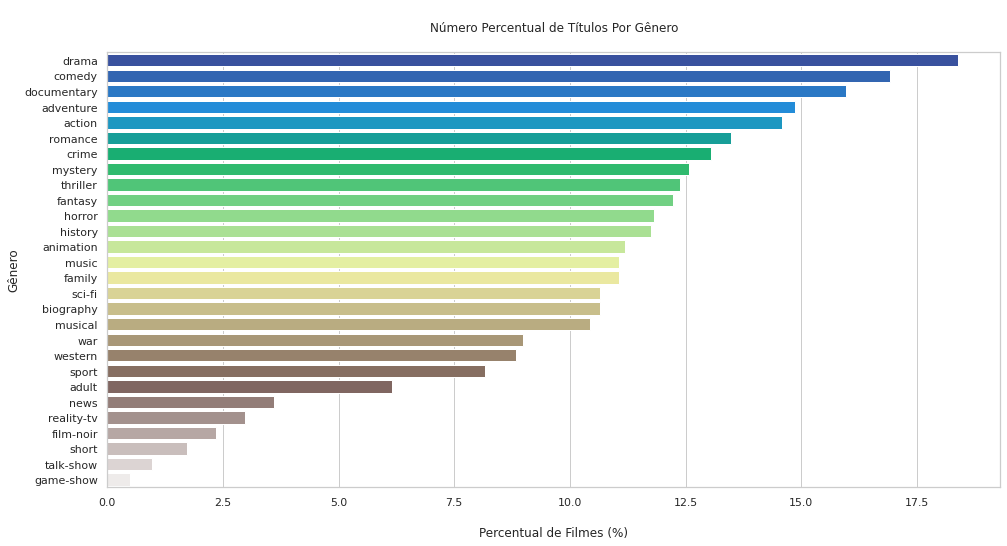

In [35]:
# Imprimindo o gráfico:

plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = "h", palette = "terrain")
plt.ylabel("Gênero")
plt.xlabel("\nPercentual de Filmes (%)")
plt.title("\nNúmero Percentual de Títulos Por Gênero\n")
plt.show()

**Resposta a Questão 02:**

Observamos que os gêneros com maior índices de títulos são:


1.   **Drama**, responsável por 19%
2.   **Comédia**, responsável por 17%
3.   **Documentários**, responsável por 16%
4.   Aventura, Ação e Romance, são equivalente aproximadamente a 15%


### **3 - Qual a Mediana de Avaliação dos Filmes Por Gênero??**

In [36]:
# Realizando a consulta

consulta3 = '''
            SELECT rating, genres FROM
            ratings JOIN titles ON ratings.title_id = titles.title_id
            WHERE premiered <= 2022 AND type = 'movie'
            '''

In [37]:
# Convertendo a query para um dataframe

resultado3 = pd.read_sql_query(consulta3, conn)

In [38]:
# Imprimindo

display(resultado3)

,rating,genres
0,4.5,\N
1,6.1,"Action,Adventure,Biography"
2,5.2,Drama
3,4.5,Drama
4,3.8,Drama
...,...,...
268980,3.6,"Action,Adventure,Thriller"
268981,5.8,Thriller
268982,6.4,"Drama,History"
268983,3.8,"Adventure,History,War"


In [39]:
#Função para extrair os Gêneros

def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos =  vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [40]:
#Instanciando a função à uma variável
generos_unicos = retorna_generos(resultado3)

In [41]:
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [42]:
#Lista vazia para receber as iterações
genero_counts = []
genero_ratings = []

In [43]:
for item in generos_unicos:
    
    # Retorna a contagem de filmes por gênero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])
  
     # Retorna a avaliação de filmes por gênero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))

In [44]:
# Prepara o dataframe final
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

In [45]:
# Visualiza
df_genero_ratings.head(20)

,genres,count,rating
0,action,28845,5.8
1,adult,4087,5.8
2,adventure,17635,6.0
3,animation,4698,6.5
4,biography,8098,7.0
5,comedy,66960,6.0
6,crime,23158,6.1
7,documentary,39513,7.3
8,drama,119428,6.3
9,family,10184,6.3


In [46]:
# Drop do índice 18 (news)
# Não queremos essa informação como gênero
df_genero_ratings = df_genero_ratings.drop(index = 18)

In [47]:
# Ordena o resultado
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)

In [48]:
# Visualiza
df_genero_ratings.head(20)

,genres,count,rating
12,game-show,3,7.40
7,documentary,39513,7.30
22,short,19,7.20
4,biography,8098,7.00
13,history,7403,6.90
24,talk-show,10,6.75
23,sport,3178,6.70
26,war,5822,6.60
11,film-noir,760,6.60
15,music,12388,6.60


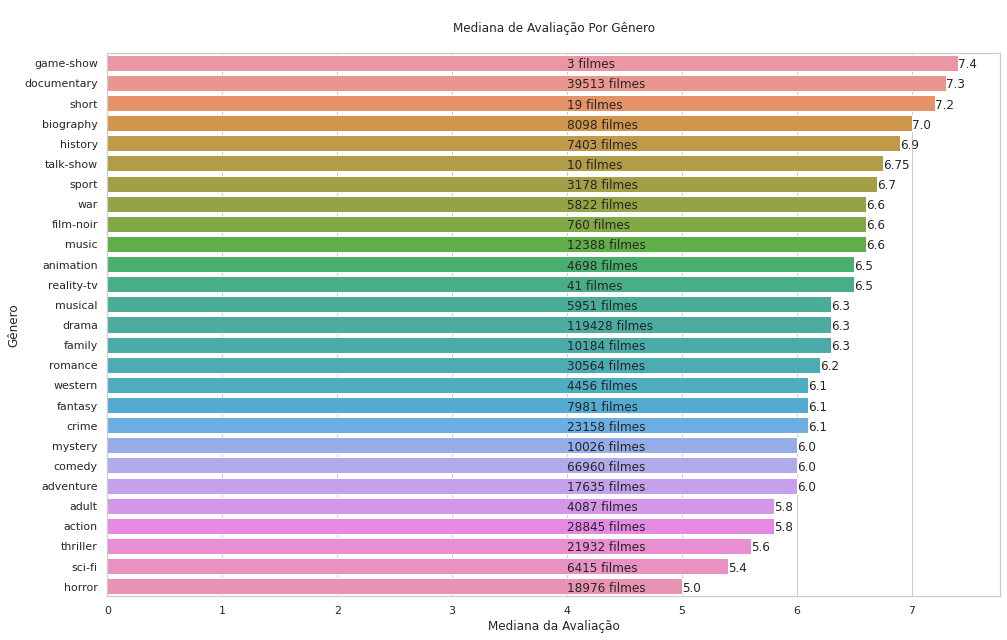

In [49]:
# Plot

# Figura
plt.figure(figsize = (16,10))

# Barplot
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")

# Textos do gráfico
for i in range(len(df_genero_ratings.index)):
    
    plt.text(4.0, 
             i + 0.25, 
             str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
             i + 0.25,
             round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))

plt.ylabel('Gênero')             
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação Por Gênero\n')
plt.show()

**Resposta a Questão 03:**

Observamos que a mediana de avaliação dos filme do gênero: Biografia, Game-Show, Documentários, e de curta metragem são superiores a 7.0


### **4 - Qual a Mediana de Avaliação dos Filmes em relação ao ano de Estreia**

In [50]:
#Realizando a consulta
consulta4 = '''
            SELECT rating AS Rating, premiered FROM
            ratings JOIN titles ON ratings.title_id = titles.title_id
            WHERE premiered <=2022 AND type = 'movie'
            ORDER BY premiered
            '''

In [51]:
#Transformando em dataframe
resultado4 = pd.read_sql_query(consulta4, conn)

In [52]:
display(resultado4)

,Rating,premiered
0,6.4,1896
1,4.4,1897
2,3.9,1899
3,3.7,1899
4,6.0,1900
...,...,...
268980,4.8,2021
268981,9.1,2021
268982,5.4,2021
268983,5.9,2021


In [53]:
# Calculando a mediana ao longo do tempo (em anos)

ratings = []
for year in set(resultado4['premiered']):
    ratings.append(np.median(resultado4[resultado4['premiered'] == year]['Rating']))

In [54]:
#Imprimindo a lista
ratings[1:10]

[4.4, 3.8, 5.9, 4.6, 3.5, 4.6, 5.4, 4.5, 3.6]

In [55]:
anos = list(set(resultado4['premiered']))

In [56]:
anos[1:11]

[1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907]

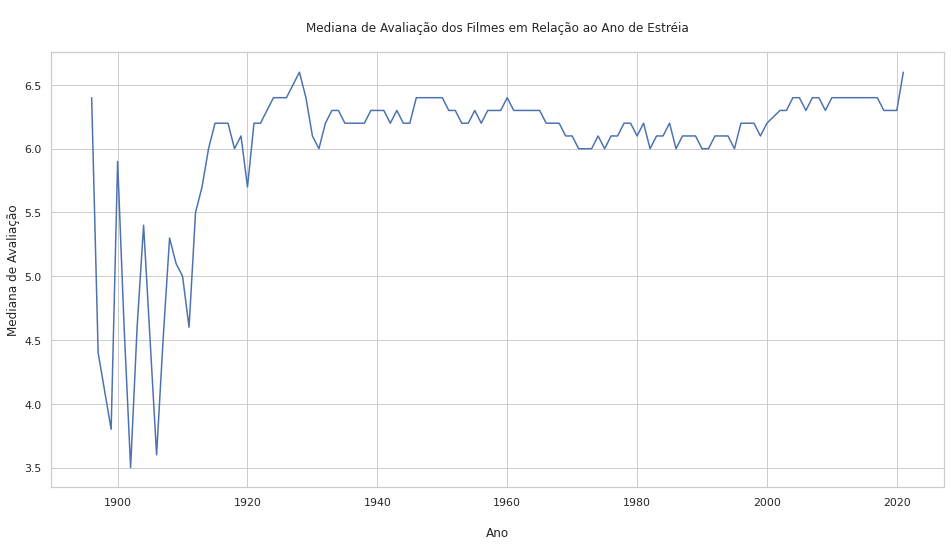

In [57]:
#Plotando a imagem
plt.figure(figsize = (16,8))
plt.plot(anos, ratings)
plt.xlabel('\nAno')
plt.ylabel('Mediana de Avaliação')
plt.title('\nMediana de Avaliação dos Filmes em Relação ao Ano de Estréia\n')
plt.show()

**Resposta a questão 04:**

Podemos notar que a mediada de avaliação dos filmes em relação ao ano de estreia foi instável entre os anos de 1900 a 1920. 

Podemos especular que tal fenônemo se deve ao não acesso da internet na na época e ao pouco interesse em filmes estreados antes de 1920.

Ademais, podemos observar que entre 1920 - 2020 a mediana de avaliação varia entre 6.0 e 6.5.

### **5 - Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?**

In [58]:
# Realizando a Busca
consulta5 = ''' SELECT genres FROM titles '''

In [59]:
# Transformando em dataframe
resultado5 = pd.read_sql_query(consulta5, conn)

In [60]:
display(resultado5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
8302890,"Action,Drama,Family"
8302891,"Action,Drama,Family"
8302892,"Action,Drama,Family"
8302893,Short


In [61]:
#Instanciando a função a uma váriavel com nova query
generos_unicos = retorna_generos(resultado5)

In [62]:
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [63]:
genero_count = []
for item in generos_unicos:
  consulta = 'SELECT COUNT(*) COUNT FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
  resultado = pd.read_sql_query(consulta, conn)
  genero_count.append(resultado['COUNT'].values[0])

In [64]:
# Prepara o dataframe
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [65]:
# Calcula os top 5
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n']
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending = False)
top_generos = df_genero_count.head()['genre'].values

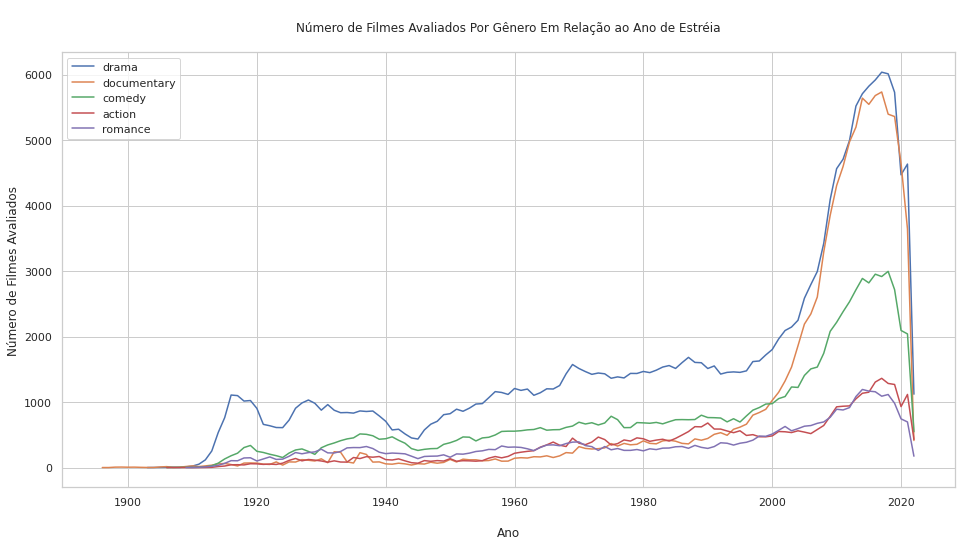

In [66]:
# Plot

# Figura
plt.figure(figsize = (16,8))

# Loop e Plot
for item in top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])

plt.xlabel('\nAno')
plt.ylabel('Número de Filmes Avaliados')
plt.title('\nNúmero de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia\n')
plt.legend(labels = top_generos)
plt.show()

**Resposta a questão 05:**

Podemos notar que o número de filmes avaliados aumentam após o ano 2000. Certamente impulsionada pelo "boom" da internet.

Observamos ainda que os filmes de drama foram os que mais receberam avaliações de acordo com o ano de estreia. Atingido 6000 avaliações entre 2019 e 2020.

Em seguida documentários com mais de 5000 avaliações na mesma faixa de ano de estreias.

### **6 - Qual o Filme Com Maior Tempo de Duração?**

In [67]:
# Realizando a busca
consulta6 = '''
            SELECT runtime_minutes AS Runtime
            FROM titles
            WHERE type = 'movie' AND Runtime != 'NaN'
            '''

In [68]:
# Tranformando a query em dataframe
resultado6 = pd.read_sql_query(consulta6, conn)

In [69]:
display(resultado6)

,Runtime
0,100
1,70
2,90
3,120
4,58
...,...
370867,123
370868,57
370869,100
370870,116


In [70]:
#Calculando o percentil
for item in range(101):
  val = item
  perc = round(np.percentile(resultado6['Runtime'].values, val),2)
  print(f'{val} percentil da duração (runtime) é: {perc}')

0 percentil da duração (runtime) é: 1.0
1 percentil da duração (runtime) é: 45.0
2 percentil da duração (runtime) é: 48.0
3 percentil da duração (runtime) é: 50.0
4 percentil da duração (runtime) é: 50.0
5 percentil da duração (runtime) é: 52.0
6 percentil da duração (runtime) é: 52.0
7 percentil da duração (runtime) é: 54.0
8 percentil da duração (runtime) é: 55.0
9 percentil da duração (runtime) é: 56.0
10 percentil da duração (runtime) é: 58.0
11 percentil da duração (runtime) é: 59.0
12 percentil da duração (runtime) é: 60.0
13 percentil da duração (runtime) é: 60.0
14 percentil da duração (runtime) é: 60.0
15 percentil da duração (runtime) é: 62.0
16 percentil da duração (runtime) é: 63.0
17 percentil da duração (runtime) é: 65.0
18 percentil da duração (runtime) é: 66.0
19 percentil da duração (runtime) é: 68.0
20 percentil da duração (runtime) é: 70.0
21 percentil da duração (runtime) é: 70.0
22 percentil da duração (runtime) é: 71.0
23 percentil da duração (runtime) é: 72.0
24 

In [71]:
# Realizando uma nova busca
consulta6 = '''
            SELECT runtime_minutes AS Runtime, primary_title
            FROM titles
            WHERE type = 'movie' AND Runtime != 'NaN'
            ORDER BY Runtime DESC
            LIMIT 1
            '''

In [72]:
resultado6 = pd.read_sql_query(consulta6, conn)

In [73]:
resultado6

,Runtime,primary_title
0,51420,Logistics


**Resposta a Questão 06:**

O filme com maior durção é o: **'Logistic'**, até o momento, com 51420 minutos, é equivalente a 857 horas, foi dirigido pelo Sueco Daniel Andersson e Erika Magnusson, o filme acompanha todo o ciclo de vida de um pedômetro (dispositivo de rastreamento de passos) em ordem cronológica reversa. 

Conta com a avaliação de 6.2 no IMDB

### **7 - Qual a Relação Entre Duração e Gênero?**

In [74]:
 #Consulta SQL
consulta7 = '''
            SELECT AVG(runtime_minutes) Runtime, genres 
            FROM titles 
            WHERE type = 'movie'
            AND runtime_minutes != 'NaN'
            GROUP BY genres
            '''

In [75]:

# Resultado
resultado7 = pd.read_sql_query(consulta7, conn)

In [76]:
# Retorna gêneros únicos
generos_unicos = retorna_generos(resultado7)

In [77]:
# Calcula duração por gênero
genero_runtime = []
for item in generos_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['Runtime']))

In [78]:
# Prepara o dataframe
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre'] = generos_unicos
df_genero_runtime['runtime'] = genero_runtime

In [79]:
# Remove índice 18 (news)
df_genero_runtime = df_genero_runtime.drop(index = 18)

In [80]:
# Ordena os dados
df_genero_runtime = df_genero_runtime.sort_values(by = 'runtime', ascending = False)

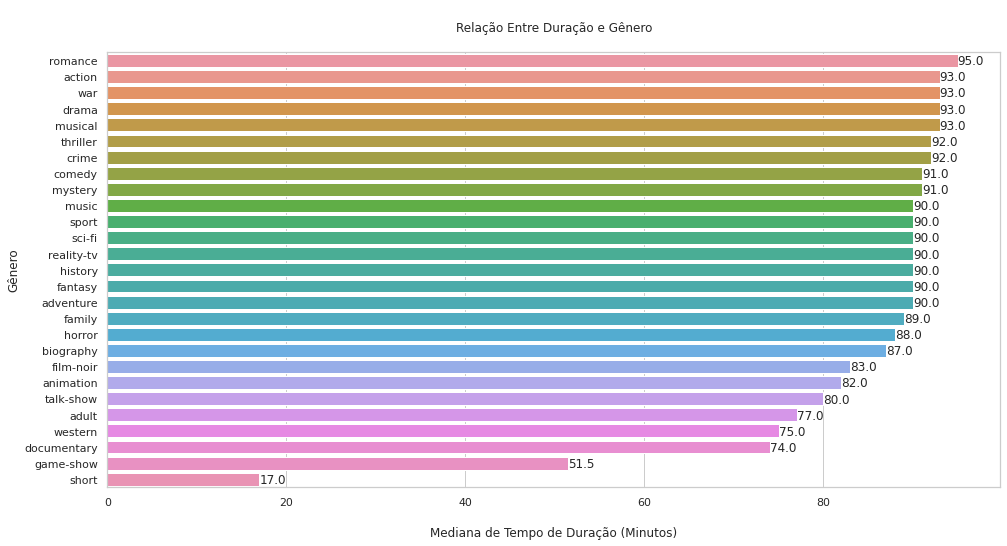

In [81]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16,8))

# Barplot
sns.barplot(y = df_genero_runtime.genre, x = df_genero_runtime.runtime, orient = "h")

# Loop
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
             i + 0.25,
             round(df_genero_runtime["runtime"][df_genero_runtime.index[i]], 2))

plt.ylabel('Gênero')             
plt.xlabel('\nMediana de Tempo de Duração (Minutos)')
plt.title('\nRelação Entre Duração e Gênero\n')
plt.show()


**Resposta a questão 05:**

Notamos que filmes de **Romance** geralmente são mais longo, com uma mediana de 95min de duração. Em contrapartida, **Ação, Guerra e Drama** ficam logo atrás com a mediana de 93min de duração.


### **8 - Qual o Número de Filmes Produzidos Por País?**

In [82]:
# Fazendo a busca
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM 
            akas JOIN titles ON 
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region
            '''

In [83]:
# Convertendo em um dataframe
resultado8 = pd.read_sql_query(consulta8, conn)

In [84]:
display(resultado8)

,region,Number_of_movies
0,AD,22
1,AE,890
2,AF,110
3,AG,12
4,AL,1237
...,...,...
229,YUCS,146
230,ZA,3057
231,ZM,11
232,ZRCD,2


In [85]:
# Visualizando a estrutura
resultado8.shape

(234, 2)

In [86]:
resultado8.shape[0]

234

In [88]:
#Lista vazia
nomes_paises = []
contagem = []

In [89]:
#Loop para transformar os códigos dos países:

for i in range (resultado8.shape[0]):
  try:
    coun = resultado8['region'].values[i]
    nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
    contagem.append(resultado8['Number_of_movies'].values[i])
  except:
    continue

In [90]:
#Adicionando colunas ao DF.
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country'] = nomes_paises
df_filmes_paises['Movie_Count'] = contagem

In [91]:
# Ordenando por nº de filmes
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_Count', ascending = False)

In [92]:
df_filmes_paises.head(10)

,country,Movie_Count
199,United States,298032
65,United Kingdom,153129
96,Japan,89127
63,France,81995
89,India,74854
32,Canada,71150
47,Germany,67541
93,Italy,63823
26,Brazil,63011
58,Spain,62591


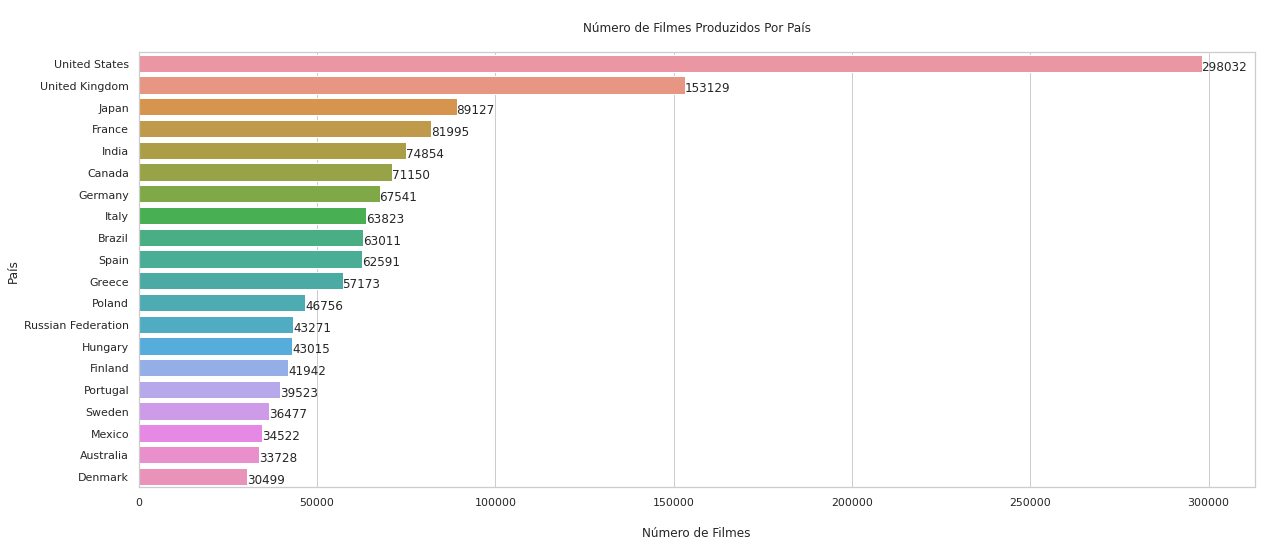

In [93]:
# Plot

# Figura
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count, orient = "h")

# Loop
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
             i + 0.30,
             round(df_filmes_paises["Movie_Count"][df_filmes_paises.index[i]],2))

plt.ylabel('País')             
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()

**Respota a questão 08:**

Os **Estado Unidos** é claramente o maior produtor de filmes do mundo, com mais de 260 mil produções. Em seguida temos **Reino Unido** com cerca de 118 mil e **Japão** com aproximadamente de 90 mil produções.

O **Brasil** ocupa a 9º posição dos TOP 10 dos maiores produtores de filmes.

### **9 - Quais são os Top 10 melhores filmes?**

In [94]:

# Consulta SQL
consulta9 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating DESC
            LIMIT 10          
            '''

In [95]:
resultado9 = pd.read_sql_query(consulta9, conn)

In [96]:
display(resultado9)

,Movie_Name,genres,rating
0,The Shawshank Redemption,Drama,9.3
1,The Chaos Class,"Comedy,Drama",9.3
2,The Godfather,"Crime,Drama",9.2
3,Soorarai Pottru,Drama,9.1
4,CM101MMXI Fundamentals,"Comedy,Documentary",9.1
5,12 Angry Men,"Crime,Drama",9.0
6,The Godfather: Part II,"Crime,Drama",9.0
7,The Dark Knight,"Action,Crime,Drama",9.0
8,David Attenborough: A Life on Our Planet,"Biography,Documentary",9.0
9,Schindler's List,"Biography,Drama,History",8.9


**Reposta a Questão 09**: 

Dos TOP10 melhores filmes de acordo com a avaliação, podemos citar 3 que chama bastante atenção:

1º O documentário "A vida do nosso planeta", narrado por David Attenborough. Trás sérias reflexões sobre o meio ambiente e o qual frágil e poderoso ele pode ser, tem uma avaliação de 9.0

2º O Poderoso Chefão 1 e 2, de Francis Coppola que relata a vida de uma família mafiosa luta para estabelecer sua supremacia nos Estados Unidos depois da Segunda Guerra Mundial, estão com a avaliação 9.2 e 9.0 respectivamente.

e por último mas não menos importante, temos o filme do Batman - Cavalheiro das Trevas com avaliação de 9.0


### **10 - Quais são os Top 10 piores filmes**

In [97]:

# Consulta SQL
consulta10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating ASC
            LIMIT 10          
            '''

In [98]:
resultado10 = pd.read_sql_query(consulta10, conn)

In [99]:
display(resultado10)

,Movie_Name,genres,rating
0,Cumali Ceber,Comedy,1.0
1,Smolensk,"Drama,Thriller",1.1
2,Sadak 2,"Action,Drama",1.1
3,Reis,"Biography,Drama",1.4
4,Justin Bieber: Never Say Never,"Documentary,Music",1.6
5,Manos: The Hands of Fate,"Drama,Horror",1.8
6,Radhe,"Action,Crime,Thriller",1.8
7,Superbabies: Baby Geniuses 2,"Comedy,Family,Sci-Fi",1.9
8,The Hottie & the Nottie,"Comedy,Romance",1.9
9,Disaster Movie,"Comedy,Sci-Fi",1.9


**Resposta a Questão 10:**

Temos os  TOP 10 filmes com o menor score de avaliação, dentre eles se destaca o documentario de Justin Bieber: Nunca diga nunca, e o filme de comédia Turco Cumali Ceber, com a pontuação de 1.0



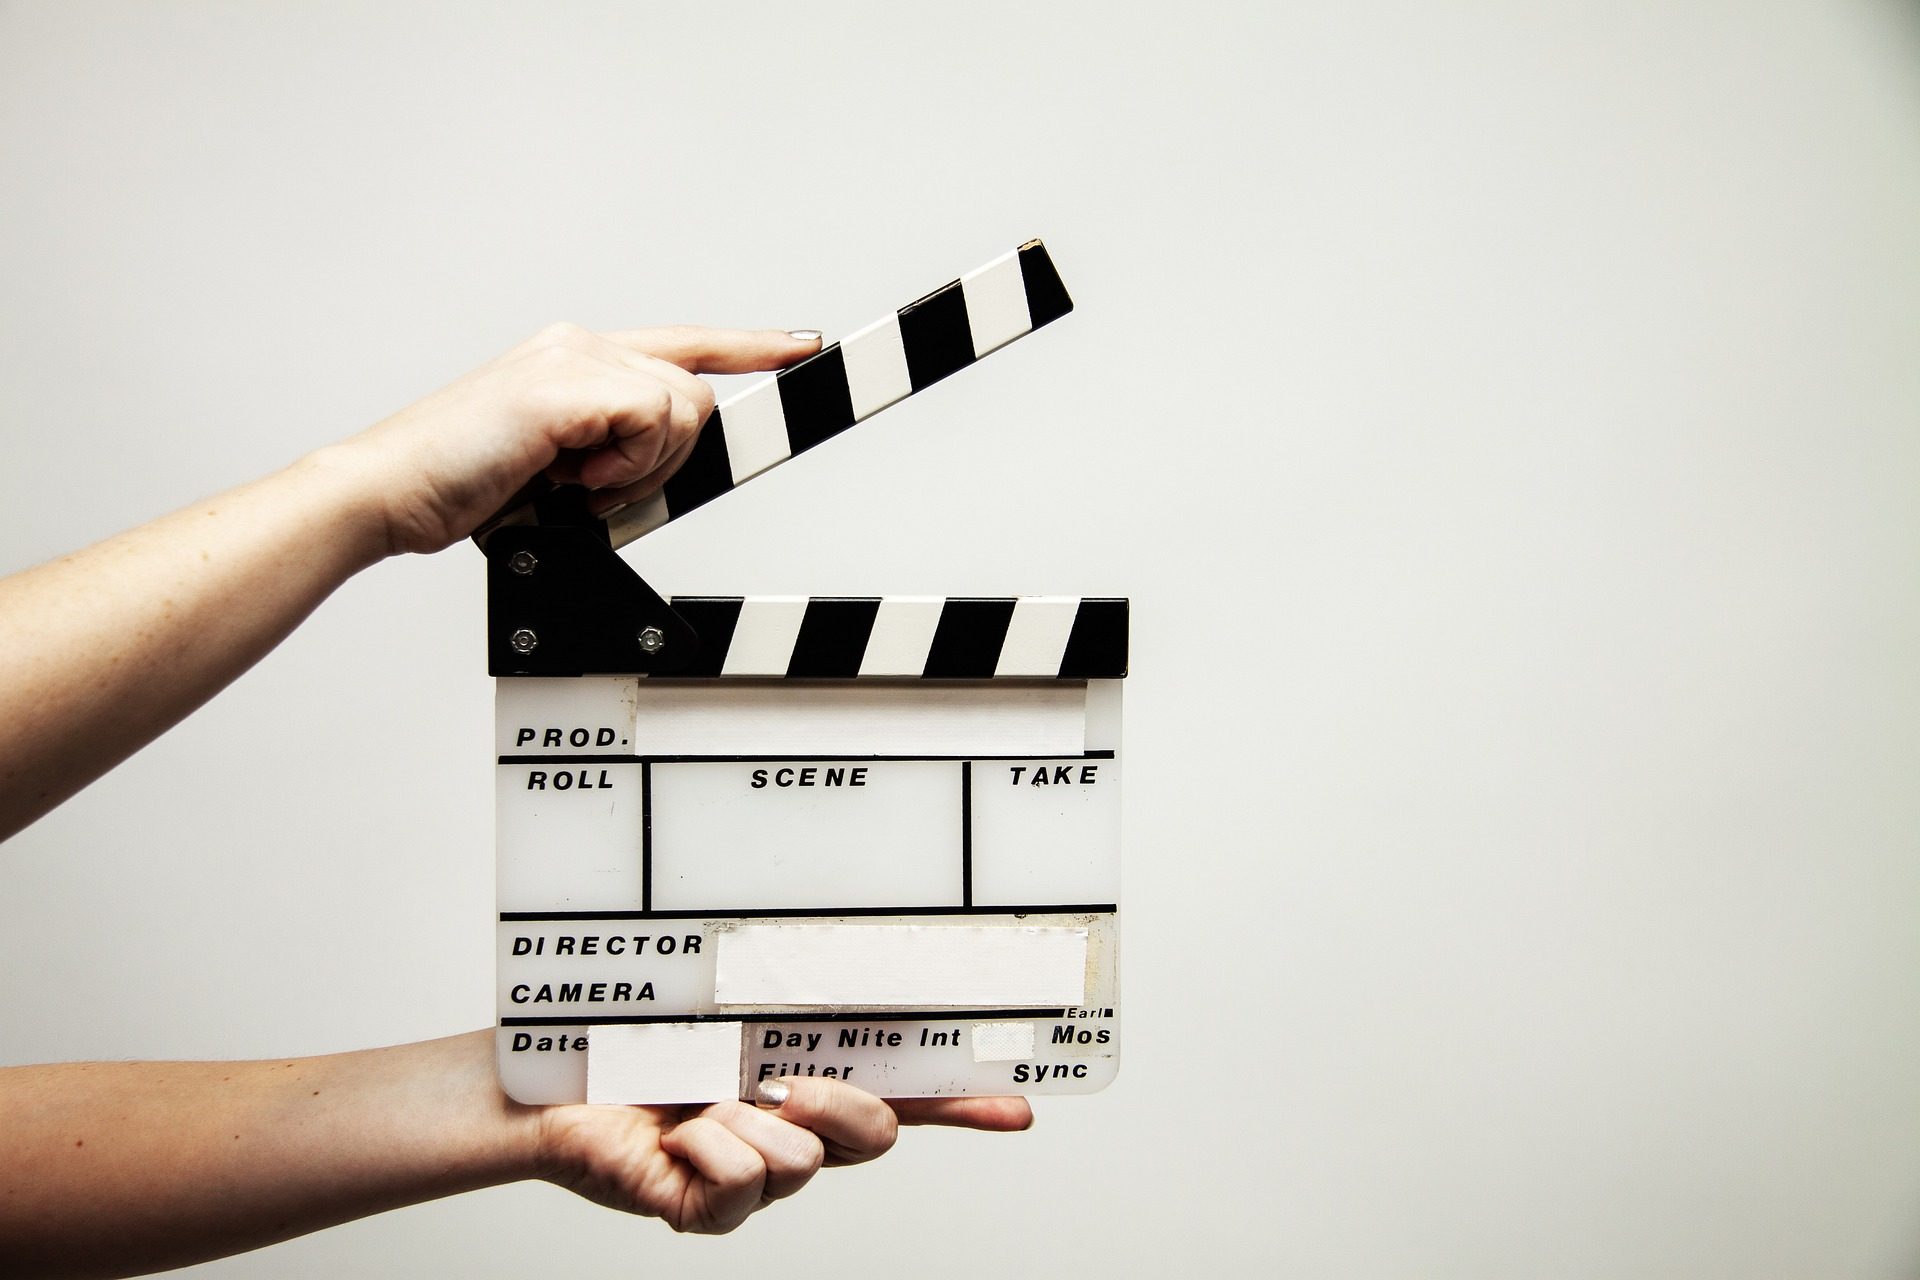

Encerramos assim a nossa análise exploratória, com 10 insights super curiosos sobre a produção de filmes e entretenimento no mundo.

E poderemos usar esses insights para avaliar quais filmes terá mais chances de ter sucesso na plataforma e quais os filmes que não valerá a pena manter no serviço de streaming.

Descubrimos ainda que o Brasil é um dos 10 maiores produtores de filmes no mundo, os 10 filmes com a melhor avaliação, as categorias mais comuns, dentre outras curiosidades sobre o assunto.